<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/mini_project_3_FULL_BengaluruHouseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from google.colab import files
import io
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df_original = pd.read_csv('Bengaluru_House_Data.csv')
df_original

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
selected_columns = ['location','size','total_sqft','price','bath']
df = pd.read_csv('Bengaluru_House_Data.csv', usecols=selected_columns, nrows=100)
df['total_sqft']=pd.to_numeric(df['total_sqft'], errors = 'coerce')
df['bath']=pd.to_numeric(df['bath'], errors = 'coerce')
df['size'] = df['size'].str.extract('(\d+)').astype(int)
le = LabelEncoder()
df['loc_LabelEncoded'] = le.fit_transform(df.location)
df=df.dropna()
print(df)
df.describe()

                     location  size  total_sqft  bath   price  \
0    Electronic City Phase II     2      1056.0   2.0   39.07   
1            Chikka Tirupathi     4      2600.0   5.0  120.00   
2                 Uttarahalli     3      1440.0   2.0   62.00   
3          Lingadheeranahalli     3      1521.0   3.0   95.00   
4                    Kothanur     2      1200.0   2.0   51.00   
..                        ...   ...         ...   ...     ...   
95                     Domlur     3      1540.0   3.0   90.00   
96                    Kengeri     4      2894.0   4.0  245.00   
97  Sarjapura - Attibele Road     3      1330.0   2.0   48.00   
98             Devasthanagalu     2      1200.0   2.0   65.00   
99              T Dasarahalli     3      1200.0   3.0   90.00   

    loc_LabelEncoded  
0                 22  
1                 10  
2                 67  
3                 49  
4                 46  
..               ...  
95                18  
96                43  
97          

,size,total_sqft,bath,price,loc_LabelEncoded
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,2.886598,1510.708660,2.804124,105.327732,38.752577
std,1.383506,856.340381,1.511340,105.045751,21.423328
min,1.000000,460.000000,1.000000,15.000000,0.000000
25%,2.000000,1070.000000,2.000000,47.000000,21.000000
50%,3.000000,1270.000000,2.000000,70.000000,39.000000
75%,3.000000,1665.000000,3.000000,122.000000,57.000000
max,8.000000,5700.000000,9.000000,650.000000,70.000000


In [ ]:
df_with_dummies = pd.get_dummies(df, prefix = 'location', columns = ['location'])
df_with_dummies

,size,total_sqft,bath,price,loc_LabelEncoded,location_ Mysore Highway,location_ Thanisandra,location_7th Phase JP Nagar,location_Adarsh Nagar,location_Begur Road,...,location_Sarjapur,location_Sarjapur Road,location_Sarjapura - Attibele Road,location_T Dasarahalli,location_Thanisandra,location_Tharabanahalli,location_Uttarahalli,location_Varthur,location_Whitefield,location_Yelahanka
0,2,1056.0,2.0,39.07,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,120.00,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,62.00,67,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1521.0,3.0,95.00,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,51.00,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,1540.0,3.0,90.00,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,4,2894.0,4.0,245.00,43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3,1330.0,2.0,48.00,63,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
98,2,1200.0,2.0,65.00,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

location            0
size                0
total_sqft          0
bath                0
price               0
loc_LabelEncoded    0
dtype: int64

In [ ]:
print(df['size'].value_counts())
print(df['location'].value_counts())
print(df['loc_LabelEncoded'].value_counts())

2    41
3    36
4     8
6     5
1     4
8     3
Name: size, dtype: int64
Whitefield          7
Kanakpura Road      4
Yelahanka           3
Electronic City     3
Bisuvanahalli       2
                   ..
Chikka Tirupathi    1
HSR Layout          1
KR Puram            1
Himagiri Meadows    1
T Dasarahalli       1
Name: location, Length: 70, dtype: int64
69    7
39    4
70    3
21    3
8     2
     ..
10    1
30    1
37    1
35    1
64    1
Name: loc_LabelEncoded, Length: 70, dtype: int64


<Figure size 1600x1000 with 0 Axes>

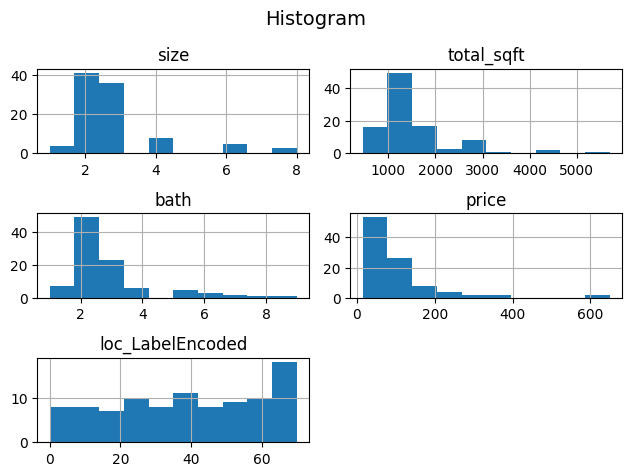

In [ ]:
plt.figure(figsize=(16,10))
df.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

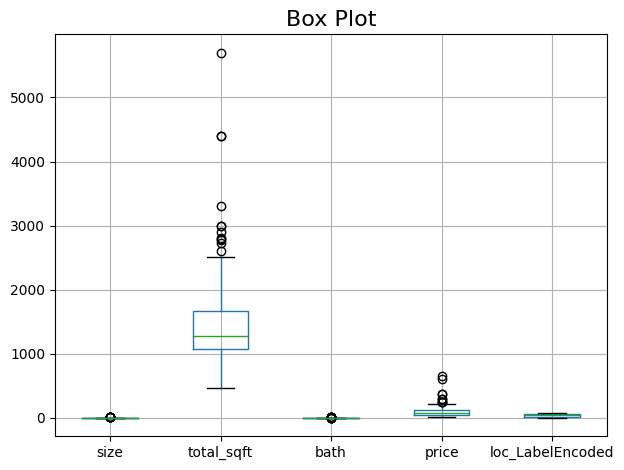

In [ ]:
df.boxplot()
plt.title("Box Plot", fontsize = 16)
plt.tight_layout()
plt.show()

<ipython-input-16-e8aa3f0c3d6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='size').mean()
<ipython-input-16-e8aa3f0c3d6c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='size').mean().plot(kind='bar')


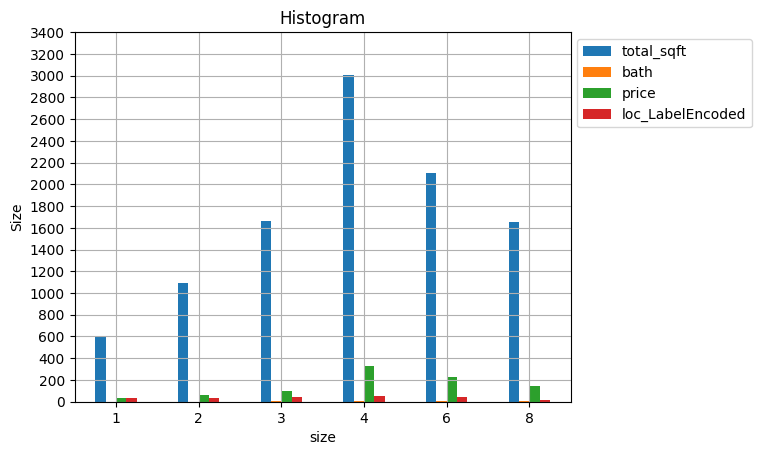

In [ ]:
df.groupby(by='size').mean()
df.groupby(by='size').mean().plot(kind='bar')
plt.title('Histogram')
plt.ylabel('Size')
plt.yticks(range(0,3500,200))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))


In [ ]:
corr=df.corr()
print(corr)

                      size  total_sqft      bath     price  loc_LabelEncoded
size              1.000000    0.417906  0.930824  0.482598         -0.039967
total_sqft        0.417906    1.000000  0.491212  0.763107          0.227822
bath              0.930824    0.491212  1.000000  0.565104         -0.019529
price             0.482598    0.763107  0.565104  1.000000          0.233166
loc_LabelEncoded -0.039967    0.227822 -0.019529  0.233166          1.000000


<ipython-input-17-a35e05d9e19d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


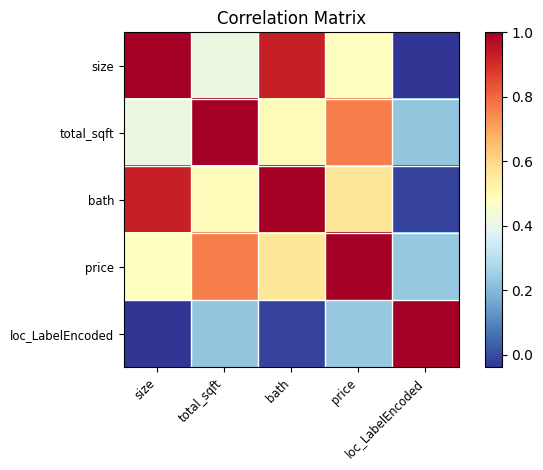

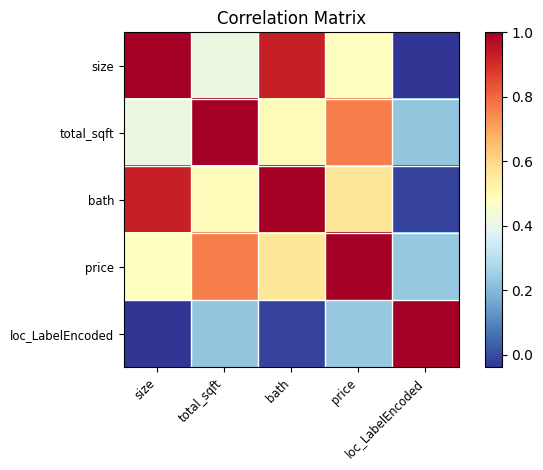

In [ ]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

Text(0.5, 0.98, 'Pair Plot')

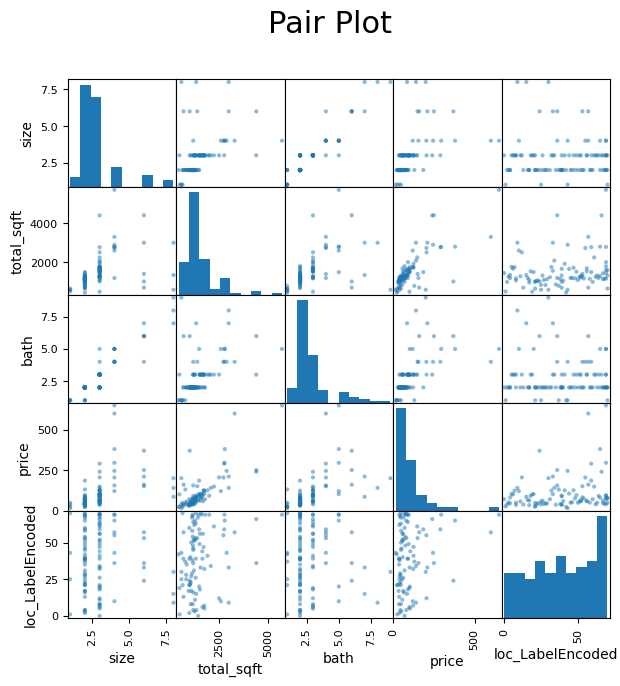

In [ ]:
scatter_matrix(df, figsize=(7,7))
plt.suptitle("Pair Plot", fontsize=22)

In [ ]:
lr=lm.LinearRegression()

In [ ]:
X = df[['size','total_sqft','bath','loc_LabelEncoded']].values
y = df['price'].values

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  -72.86281330243432
Coefficient:  [-9.99606105  0.07388589 27.3643695   0.48234269]


In [ ]:
predicted_price = lr.predict(X)
df['predicted_price']=predicted_price
size_input=(int(input("Enter number of bedrooms: ")))
SQFT_input = (int(input("Enter total size in sqft: ")))
loc_encoded_input = int(input("Enter code of location: "))
bath_input = int(input("Enter number of bathrooms: "))
new_data = np.array([[size_input, SQFT_input, bath_input, loc_encoded_input]])
pred_price = lr.predict(new_data)
print("Predicted price for the given input: ",pred_price)
df

Enter number of bedrooms: 3
Enter total size in sqft: 2300
Enter code of location: 22
Enter number of bathrooms: 2
Predicted price for the given input:  [132.42683001]


,location,size,total_sqft,bath,price,loc_LabelEncoded,predicted_price
0,Electronic City Phase II,2,1056.0,2.0,39.07,22,50.508843
1,Chikka Tirupathi,4,2600.0,5.0,120.00,10,220.901532
2,Uttarahalli,3,1440.0,2.0,62.00,67,90.590385
3,Lingadheeranahalli,3,1521.0,3.0,95.00,49,115.257343
4,Kothanur,2,1200.0,2.0,51.00,46,72.724636
...,...,...,...,...,...,...,...
95,Domlur,3,1540.0,3.0,90.00,18,101.708552
96,Kengeri,4,2894.0,4.0,245.00,43,231.176923
97,Sarjapura - Attibele Road,3,1330.0,2.0,48.00,63,80.533567
98,Devasthanagalu,2,1200.0,2.0,65.00,16,58.254355


In [ ]:
r2 = r2_score(y, predicted_price)
print("R-Squared Value:           ", r2)
mae = mean_absolute_error(y, predicted_price)
print("Mean Absolute Error Value: ", mae)
rmse = np.sqrt(mean_squared_error(y, predicted_price))
print("RMSE Value:                ", rmse)

R-Squared Value:            0.6415214367029365
Mean Absolute Error Value:  37.40969838043809
RMSE Value:                 62.56908962175767


In [ ]:
lr1 = lm.LinearRegression()

In [ ]:
X1 = df[['size','total_sqft','bath','loc_LabelEncoded']].values
y1 = df['price'].values

In [ ]:
degree = 4
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly = poly_features.fit_transform(X1)
lr1.fit(X1_poly, y1)

LinearRegression()

In [ ]:
print('Intercept: ', lr1.intercept_)
print('Coefficient: ', lr1.coef_)

Intercept:  173.31438495700982
Coefficient:  [-6.70594031e-03 -2.65194013e-01  3.59383980e-01 -1.04291619e+01
  1.19047123e+00 -1.10809222e+00 -9.14537975e-01  1.17933457e+01
  7.72619432e-04  6.33951095e-01 -1.96224727e-02 -2.18085420e+00
  1.62403183e+01 -3.93008236e-02  2.33391817e+00  8.98720474e-01
 -3.99765613e+00 -1.50023552e+01 -5.45293850e-04 -9.89217606e-01
  3.04318253e-02 -7.40219842e+00  1.02659291e+00  6.04039454e-01
 -1.04019656e-06  1.40276557e-03  2.36785135e-05  5.82550898e-02
 -6.01907514e-02  8.54438013e-04 -8.54352925e+00  1.63054255e+01
 -1.15229829e+00  1.90098814e-03  2.72248037e+00 -3.17232884e-02
 -8.45049828e+00  4.01541027e+00 -8.15621672e-05 -6.80233922e-02
  1.41505048e-03 -8.65329754e+00 -3.93169527e+00 -4.66981161e-01
  8.07574422e-07 -6.52854161e-04 -2.26281287e-05  4.26403571e-01
  7.84227253e-03  1.03335518e-04 -1.38721375e+00 -1.50537533e+00
  7.61827486e-01  8.03397784e-04  1.17499843e-10 -6.50694556e-07
 -8.78919781e-09  4.48689854e-04  2.98810541e

In [ ]:
predicted_price = lr1.predict(X1_poly)
df['predicted_price']=predicted_price

size_input=(int(input("Enter number of bedrooms: ")))
SQFT_input = (int(input("Enter total size in sqft: ")))
loc_encoded_input = int(input("Enter code of location: "))
bath_input = int(input("Enter number of bathrooms: "))
new_data_poly=poly_features.transform(np.array([[size_input, SQFT_input, bath_input, loc_encoded_input]]))
pred_price = lr1.predict(new_data_poly)
print("Predicted price for the given input: ",pred_price)

df

Enter number of bedrooms: 2
Enter total size in sqft: 1500
Enter code of location: 22
Enter number of bathrooms: 1
Predicted price for the given input:  [52.47904423]


,location,size,total_sqft,bath,price,loc_LabelEncoded,predicted_price
0,Electronic City Phase II,2,1056.0,2.0,39.07,22,51.941211
1,Chikka Tirupathi,4,2600.0,5.0,120.00,10,125.047314
2,Uttarahalli,3,1440.0,2.0,62.00,67,63.172753
3,Lingadheeranahalli,3,1521.0,3.0,95.00,49,68.530476
4,Kothanur,2,1200.0,2.0,51.00,46,68.272576
...,...,...,...,...,...,...,...
95,Domlur,3,1540.0,3.0,90.00,18,99.009670
96,Kengeri,4,2894.0,4.0,245.00,43,233.197452
97,Sarjapura - Attibele Road,3,1330.0,2.0,48.00,63,36.738662
98,Devasthanagalu,2,1200.0,2.0,65.00,16,57.521130


In [ ]:
r2 = r2_score(y1, predicted_price)
print("R-Squared Value:            ", r2)
mae = mean_absolute_error(y1, predicted_price)
print("Mean Absolute Error Value:  ", mae)
rmse = np.sqrt(mean_squared_error(y1, predicted_price))
print("RMSE Value:                 ", rmse)

R-Squared Value:             0.9819911694123413
Mean Absolute Error Value:   10.36587013576718
RMSE Value:                  14.023970747034808
